In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

device = "mps"

In [2]:
torch.__version__

'2.7.0'

# 1. Załadowanie danych treningowych

In [3]:
def get_data(path : str):
    data = np.loadtxt(path, dtype = int)
    return torch.tensor(data, dtype = torch.float)

In [4]:
L = 30

train_path = f"data/L_{L}/Xtrain.txt"
Xtrain = get_data(train_path).to(device)


path = f"data/L_{L}/Xtest.txt"
Xtest = get_data(path).to(device)

path = f"data/L_{L}/ytrain.txt"
ytrain = get_data(path).to(device).squeeze()

path = f"data/L_{L}/ytest.txt"
ytest = get_data(path).to(device).squeeze()

In [5]:
Ttrain='1.0000000000000000 1.0634592657106510 1.1269185314213019 1.1903777971319529 1.2538370628426039 1.3172963285532548 1.3807555942639058 1.4442148599745568 1.5076741256852078 1.5711333913958587 1.6345926571065097 1.6980519228171607 1.7615111885278116 1.8249704542384626 1.8884297199491136 1.9518889856597645 2.0153482513704155 2.0788075170810667 2.1422667827917179 2.2057260485023691 2.2691853142130203 2.3326445799236715 2.3961038456343227 2.4595631113449739 2.5230223770556250 2.5864816427662762 2.6499409084769274 2.7134001741875786 2.7768594398982298 2.8403187056088810 2.9037779713195322 2.9672372370301834 3.0306965027408346 3.0941557684514858 3.1576150341621370 3.2210742998727881 3.2845335655834393 3.3479928312940905 3.4114520970047417 3.4749113627153929 3.5383706284260401'

In [6]:
Ttest='1.0000000000000000 1.0634592657106510 1.1269185314213019 1.1903777971319529 1.2538370628426039 1.3172963285532548 1.3807555942639058 1.4442148599745568 1.5076741256852078 1.5711333913958587 1.6345926571065097 1.6980519228171607 1.7615111885278116 1.8249704542384626 1.8884297199491136 1.9518889856597645 2.0153482513704155 2.0788075170810667 2.1422667827917179 2.2057260485023691 2.2691853142130203 2.3326445799236715 2.3961038456343227 2.4595631113449739 2.5230223770556250 2.5864816427662762 2.6499409084769274 2.7134001741875786 2.7768594398982298 2.8403187056088810 2.9037779713195322 2.9672372370301834 3.0306965027408346 3.0941557684514858 3.1576150341621370 3.2210742998727881 3.2845335655834393 3.3479928312940905 3.4114520970047417 3.4749113627153929 3.5383706284260401'

In [7]:
Ttrain == Ttest

True

In [8]:
Ttest = np.array(Ttest.split(), dtype = float)

In [9]:
len(Ttest)

41

# 2. Zrozumienie danych treningowych

In [10]:
Xtrain[-1]

tensor([0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
        0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 

In [11]:
len(Xtrain), len(ytrain), len(Xtest), len(ytest)

(100000, 100000, 10250, 10250)

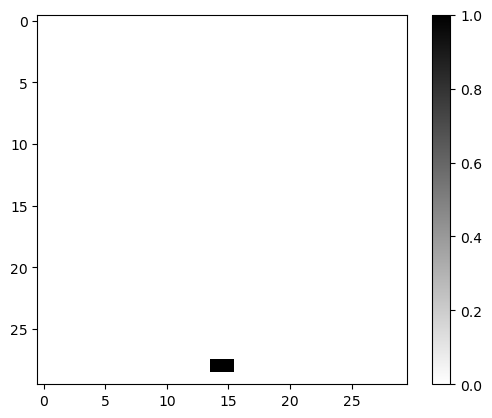

In [12]:
x_numpy = Xtest[100].cpu().numpy()
x_numpy = x_numpy.reshape((L, L))
x_numpy

plt.imshow(x_numpy, cmap = "gray_r")
plt.colorbar()

In [13]:
ytrain[-10:]

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='mps:0')

# 3. Utworzenie sieci neuronowej

In [14]:
model = nn.Sequential(
    nn.Linear( L*L, 100),
    nn.Sigmoid(),
    nn.Linear(100, 2),
    nn.Sigmoid()
).to(device)

In [15]:
model(Xtrain[42])

tensor([0.5202, 0.4854], device='mps:0', grad_fn=<SigmoidBackward0>)

# 4. Wizualizacja działania sieci neuronowej

In [16]:
def make_predictions(model, X):
    model.eval()

    with torch.inference_mode():
        output = model(X)

    preds = torch.argmax(output, dim = -1)

    return preds.squeeze()

In [17]:
def plot_example_prediction(model, X, y, idx: None):
    if idx is None:    
        idx = np.random.randint(len(X))

    pred = make_predictions(model, X[idx]).item()

    agreement = (pred == y[idx])

    l = int(np.sqrt(X.shape[1]))
    X_numpy = X[idx].cpu().numpy().reshape((l, l))

    plt.imshow(X_numpy, vmin = 0, vmax = 1, cmap = "gray_r")
    plt.colorbar()

    color = "green" if agreement else "red"

    phase = "ferromagnetic" if pred == 0 else "paramagnetic"

    plt.title(f"predicted phase: {phase}", color = color)
    plt.show()

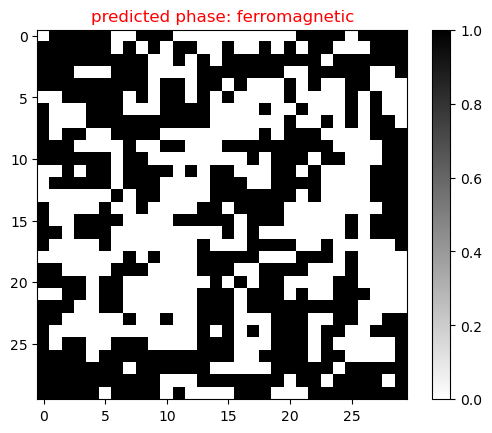

In [18]:
idx= -245
plot_example_prediction(model, Xtest, ytest, idx = idx)

In [19]:
def plot_output_layer(model, X = Xtest, temperatures = Ttest, samples_per_temp = 250):
    model.eval()

    means_neuron_1, means_neuron_2 = [], []
    errors_n1, errors_n2 =[], []
    
    for i in range(len(temperatures)):
        idx_min = i * samples_per_temp
        idx_max = idx_min + samples_per_temp

        with torch.inference_mode():
            output = model(X[idx_min:idx_max])

        output = torch.permute(output, dims = (1, 0))
        means = torch.mean(output, dim=-1)
        std =   torch.std(output, dim = -1, unbiased = False)

        means_neuron_1.append(means[0].item())
        means_neuron_2.append(means[1].item())

        errors_n1.append( std[0].item() / (samples_per_temp)**0.5 )
        errors_n2.append( std[1].item() / (samples_per_temp)**0.5 )

    plt.errorbar(temperatures, means_neuron_1, yerr = errors_n1, fmt = "-o",
                markersize = 2, color = "blue", label = "Neuron 1")
    plt.errorbar(temperatures, means_neuron_2, yerr = errors_n2, fmt = "-x",
                markersize = 2, color = "orange", label = "Neuron 2")
    plt.xlabel("Temperature")
    plt.ylabel("Average output layer")
    plt.axvline(x = 2 / (np.log(1+np.sqrt(2))), color = "orange")
    plt.legend()

    plt.xlim(temperatures[0], temperatures[-1])
    plt.ylim(-0.05, 1.05)

    plt.show()

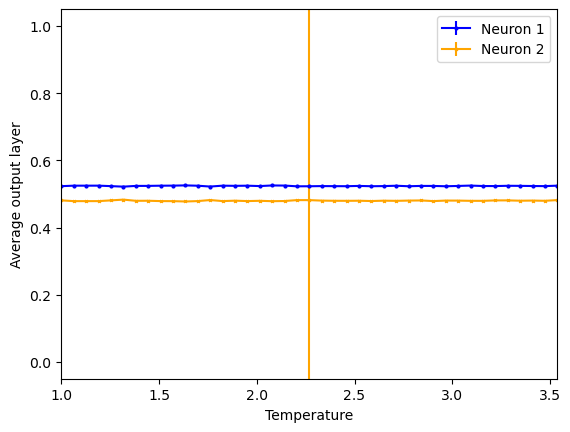

In [20]:
plot_output_layer(model)

In [21]:
def get_accuracy(model, X, y):
    model.eval()

    with torch.inference_mode():
        preds = make_predictions(model, X)

    agreement = (preds == y)

    return torch.sum(agreement).item() / len(y)

In [22]:
get_accuracy(model, Xtest, ytest)

0.500390243902439

In [23]:
def plot_accuracy_vs_temp(model, X = Xtest, y = ytest, temperatures = Ttest, samples_per_temp = 250):
    model.eval()

    acc_list = []

    for i in range(len(temperatures)):
        idx_min = i * samples_per_temp
        idx_max = idx_min + samples_per_temp

        acc_list.append( get_accuracy(model, X[idx_min:idx_max], y[idx_min:idx_max]) )

    plt.plot(temperatures, acc_list, "-o")
    plt.xlabel("Temperature")
    plt.ylabel("Accuracy")
    plt.axvline(x = 2 / (np.log(1+np.sqrt(2))), color = "orange")
    plt.xlim(temperatures[0], temperatures[-1])
    plt.ylim(-0.05, 1.05)
    plt.show()

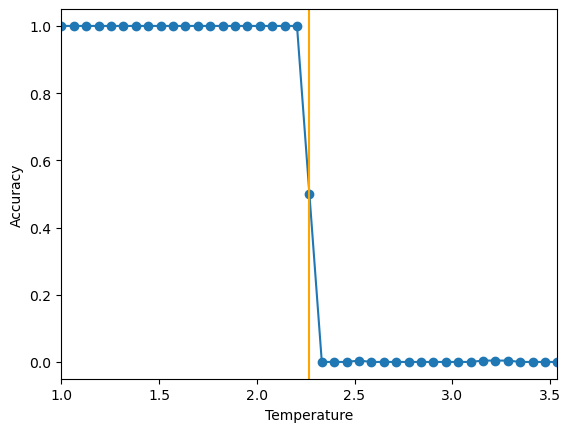

In [24]:
plot_accuracy_vs_temp(model)

# 5. Metoda - trening sieci neuronowej

In [25]:
def train_model(model, 
                epochs, 
                Xtrain = Xtrain, 
                Xtest = Xtest, 
                ytrain = ytrain, 
                ytest = ytest):
    
    optimizer = torch.optim.Adam(model.parameters(), weight_decay = 0.5e-4)
    loss_fn = nn.CrossEntropyLoss()

    train_loss_list, test_loss_list = [], []

    for epoch in range(epochs):
        # Training
        model.train()

        output = model(Xtrain).squeeze()

        loss = loss_fn(output, ytrain)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        train_loss_list.append(loss.item())

        ### Testing
        model.eval()

        with torch.inference_mode():
            output = model(Xtest).squeeze()

        loss = loss_fn(output, ytest)

        test_loss_list.append(loss.item())

        if epoch % 200 == 0:
            print(f"Epoch: {epoch} | Train loss: {train_loss_list[-1]:.3f} | Test loss: {test_loss_list[-1]:.3f}")

    plt.plot(train_loss_list, label = "Training loss")
    plt.plot(test_loss_list, label = "Test loss")
    plt.legend()
    plt.xlabel("Epoch")
    plt.yscale("log")
    plt.show()

    return train_loss_list, test_loss_list
    

# 6. Trening

Epoch: 0 | Train loss: 0.693 | Test loss: 0.695
Epoch: 200 | Train loss: 0.444 | Test loss: 0.452
Epoch: 400 | Train loss: 0.363 | Test loss: 0.376
Epoch: 600 | Train loss: 0.346 | Test loss: 0.360
Epoch: 800 | Train loss: 0.338 | Test loss: 0.354
Epoch: 1000 | Train loss: 0.334 | Test loss: 0.350
Epoch: 1200 | Train loss: 0.331 | Test loss: 0.348
Epoch: 1400 | Train loss: 0.330 | Test loss: 0.346
Epoch: 1600 | Train loss: 0.327 | Test loss: 0.345
Epoch: 1800 | Train loss: 0.326 | Test loss: 0.344
Epoch: 2000 | Train loss: 0.325 | Test loss: 0.343
Epoch: 2200 | Train loss: 0.324 | Test loss: 0.342
Epoch: 2400 | Train loss: 0.324 | Test loss: 0.342
Epoch: 2600 | Train loss: 0.323 | Test loss: 0.342
Epoch: 2800 | Train loss: 0.323 | Test loss: 0.341
Epoch: 3000 | Train loss: 0.322 | Test loss: 0.341
Epoch: 3200 | Train loss: 0.322 | Test loss: 0.341
Epoch: 3400 | Train loss: 0.322 | Test loss: 0.340
Epoch: 3600 | Train loss: 0.321 | Test loss: 0.340
Epoch: 3800 | Train loss: 0.321 | Test

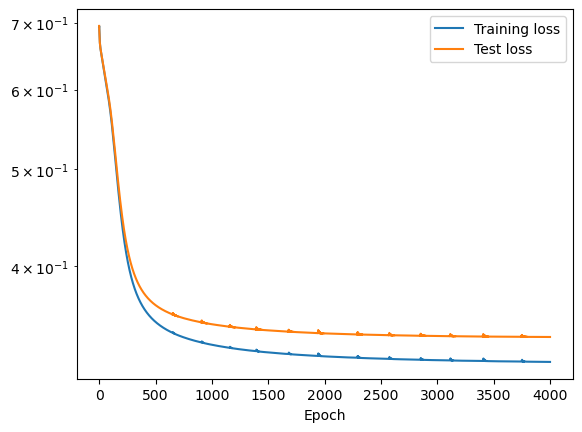

In [26]:
EPOCHS = 4000

train_model(model, EPOCHS);

# 7. Ewaluacja sieci po treningu

In [27]:
get_accuracy(model, Xtest, ytest)

0.9741463414634146

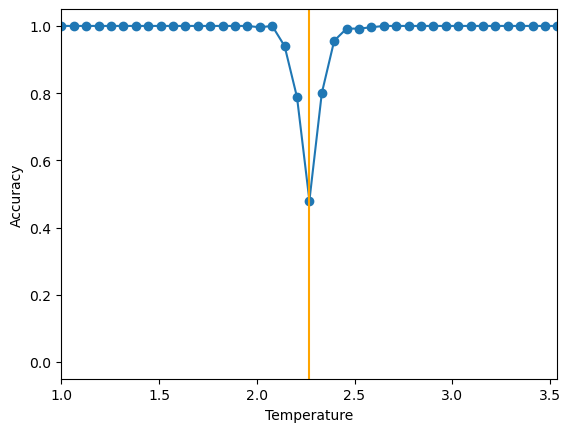

In [28]:
plot_accuracy_vs_temp(model)

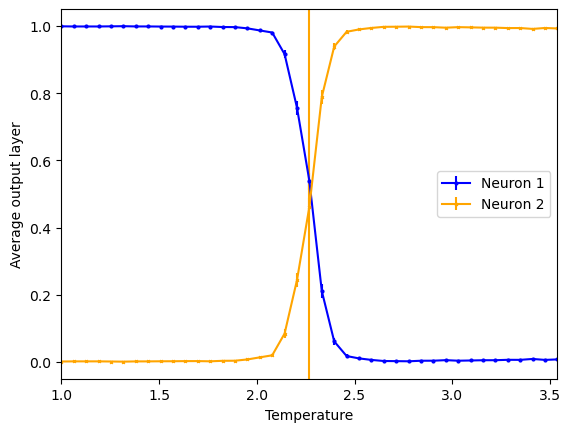

In [29]:
plot_output_layer(model)